In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import fft
from scipy.fftpack import fftfreq
import pandas as pd
from scipy import signal as sig
from scipy.fftpack import irfft

In [2]:
np.linspace(1,3,5)

array([1. , 1.5, 2. , 2.5, 3. ])

In [66]:
SAMPLE_RATE = 44100 # number of samples to be collected per second i.e this is equal to 20000 Hz
DURATION = 15 # duration of the signal, here it will last for 15 seconds
freq = 2 # generate a 2 hz sine wave from a 20000 Hz signal lasting for 15 seconds

In [71]:
def generate_sine_wave(freq,duration,sample_rate):
    x = np.linspace(0,duration,sample_rate*duration)
    frequency = x*2
    y = np.sin((2*np.pi)*frequency)
    plt.figure(figsize=(15,5))
    plt.plot(frequency,y)
    plt.ylabel('Amplitude')
    plt.xlabel('Frequency')
    plt.show()
    return frequency,y

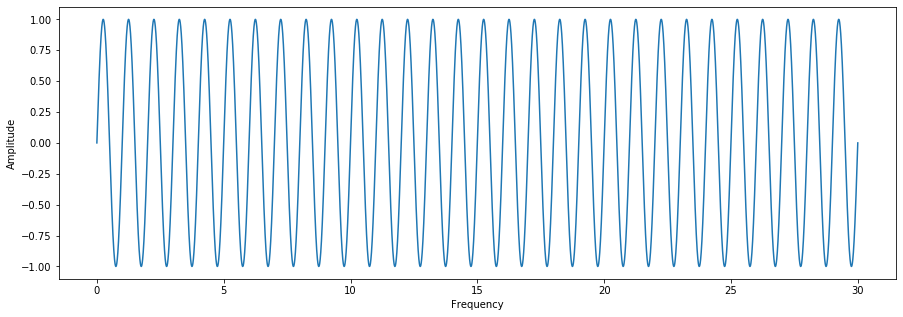

In [72]:
frequency,y=generate_sine_wave(freq,DURATION,SAMPLE_RATE)

### Generating a signal containing true signal (400 Hz) & noisy signal (4000 Hz)

### Multiplying noisy signal by 0.2 to reduce magnitude of signal

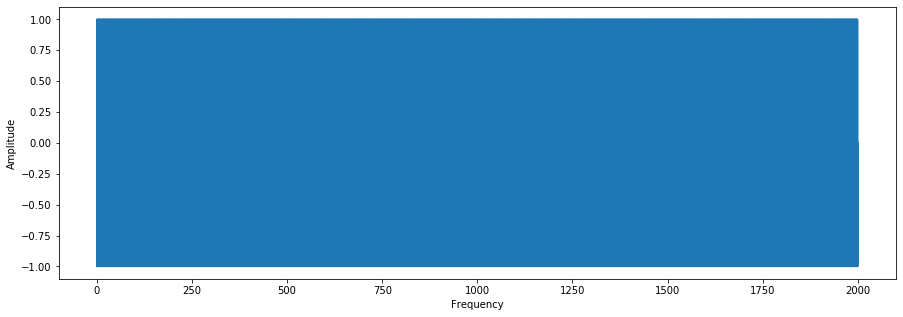

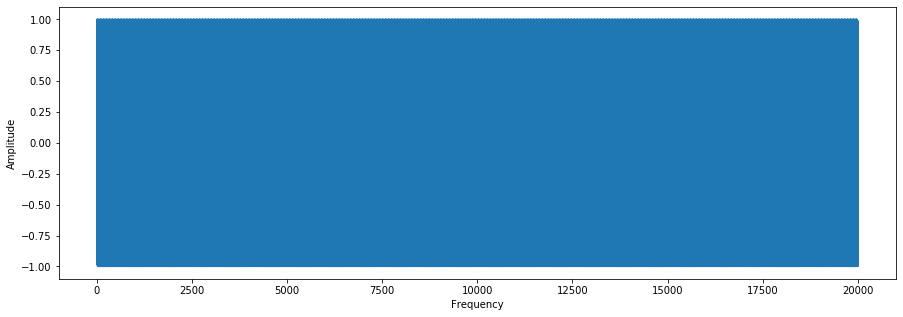

In [6]:
_,nice_signal = generate_sine_wave(400,DURATION,SAMPLE_RATE)
_,noise_signal = generate_sine_wave(4000,DURATION,SAMPLE_RATE)
noise_signal = 0.2*noise_signal

In [7]:
noise_signal

array([ 0.00000000e+00,  1.07910584e-01,  1.81710997e-01, ...,
       -1.81710997e-01, -1.07910584e-01, -3.88545883e-13])

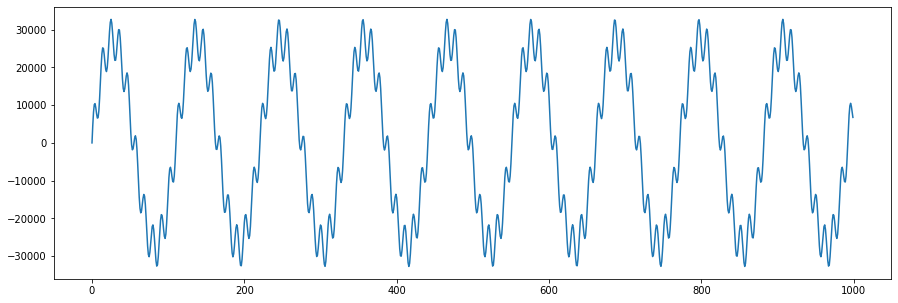

In [10]:
mixed_tone = nice_signal+noise_signal
normalized_tone = np.int16((mixed_tone / mixed_tone.max()) * 32767)

plt.figure(figsize=(15,5))
plt.plot(normalized_tone[:1000])
plt.show()

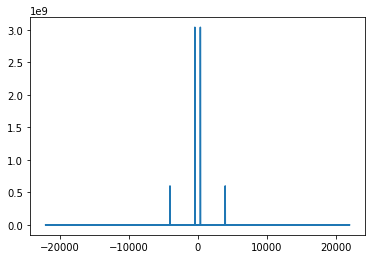

In [29]:
N = SAMPLE_RATE*DURATION
yf = fft(normalized_tone)
xf = fftfreq(N,1/SAMPLE_RATE)
plt.plot(xf,np.abs(yf))
plt.show()

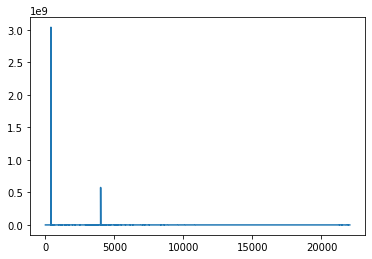

In [30]:
from scipy.fftpack import rfft, rfftfreq

# Note the extra 'r' at the front
fft_output = rfft(normalized_tone)
power = np.abs(fft_output)
freq = rfftfreq(N, 1 / SAMPLE_RATE)

plt.plot(freq, power)
plt.show()

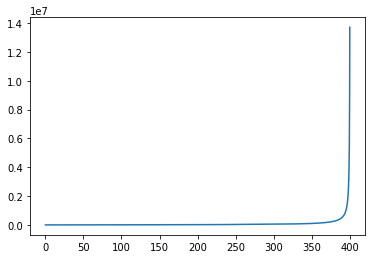

In [49]:
peaks = sig.find_peaks(power[freq <=400])[0]
peak_freq =  freq[peaks]
peak_power = power[peaks]
plt.plot(peak_freq, peak_power)


In [52]:
output = pd.DataFrame()
output['index'] = peaks
output['frequency'] = peak_freq
output['amplitude'] = peak_power
output['fft'] = fft_output[peaks]
output = output.sort_values('amplitude', ascending=False)

output

,index,frequency,amplitude,fft
1997,3996,399.6,1.371139e+07,-1.371139e+07
1996,3994,399.4,9.152652e+06,-9.152652e+06
1995,3992,399.2,6.868090e+06,-6.868090e+06
1994,3990,399.0,5.495684e+06,-5.495684e+06
1993,3988,398.8,4.579951e+06,-4.579951e+06
...,...,...,...,...
14,30,3.0,3.477023e+01,-3.477023e+01
23,48,4.8,3.310574e+01,-3.310574e+01
12,26,2.6,2.029984e+01,2.029984e+01
7,16,1.6,1.402773e+01,1.402773e+01


In [55]:
filtered_fft_output = np.array([f if i == 3996 else 0 for i, f in enumerate(fft_output)])
filtered_sig = irfft(filtered_fft_output)

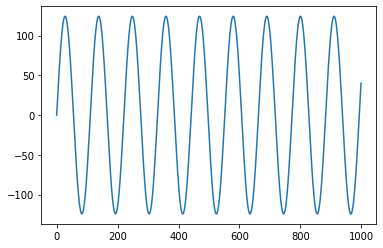

In [56]:

plt.plot(filtered_sig[:1000])
plt.show()